In [8]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from scipy.optimize import minimize 

In [9]:
#Setting date limits of 5 years from current date
end_date = datetime.today()
start_date = start = end_date - timedelta(days = 365 *5)

In [43]:
tickers = ['CBA.AX', 'BHP.AX', 'IOO.AX', 'VAS.AX', 'IOZ.AX', 'WBC.AX', 'CSL.AX', 'NDQ.AX']

In [44]:
# Fetch historical data
returns = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = start_date,end = end_date)
    returns[ticker] = data['Adj Close'].pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [45]:
print(returns)

              CBA.AX    BHP.AX    IOO.AX    VAS.AX    IOZ.AX    WBC.AX  \
Date                                                                     
2019-07-16 -0.002591  0.003902  0.001845 -0.002019 -0.002211 -0.005394   
2019-07-17  0.005813  0.014092  0.000000  0.004760  0.004062  0.000723   
2019-07-18  0.000738 -0.014854 -0.011758 -0.004027 -0.004413 -0.003613   
2019-07-19  0.008724 -0.001459  0.009174  0.008918  0.009605  0.010878   
2019-07-22 -0.002924  0.006819 -0.006818 -0.002475 -0.002195 -0.001435   
...              ...       ...       ...       ...       ...       ...   
2024-07-05 -0.005944 -0.008488  0.000894 -0.001032 -0.002218 -0.005484   
2024-07-08 -0.004957 -0.020500  0.000069 -0.007645 -0.006669 -0.002574   
2024-07-09  0.017554  0.005980  0.006112  0.007912  0.008632  0.020273   
2024-07-10 -0.001166 -0.013032 -0.000887 -0.001239 -0.001902 -0.005780   
2024-07-11  0.010736  0.009034  0.008266  0.009515  0.009527  0.003997   

              CSL.AX    NDQ.AX  
Date

In [46]:
cov_matrix = returns.cov()*252

In [47]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)
def expect_return(weights, returns):
    return np.sum(returns.mean()*weights)*252
def sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    return(expect_return(weights, returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

In [48]:
risk_free_rate = 0.02
def neg_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, returns, cov_matrix, risk_free_rate)
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.4) for _ in range(len(tickers))]
initial_weights = np.array([1/len(tickers)]*len(tickers))
optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)

In [49]:
optimal_weights = optimized_results.x

print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expect_return(optimal_weights, returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights,returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
CBA.AX: 0.1501
BHP.AX: 0.0507
IOO.AX: 0.4000
VAS.AX: 0.0000
IOZ.AX: 0.0000
WBC.AX: 0.0000
CSL.AX: 0.0000
NDQ.AX: 0.3992
Expected Annual Return: 0.1907
Expected Volatility: 0.1587
Sharpe Ratio: 1.0756


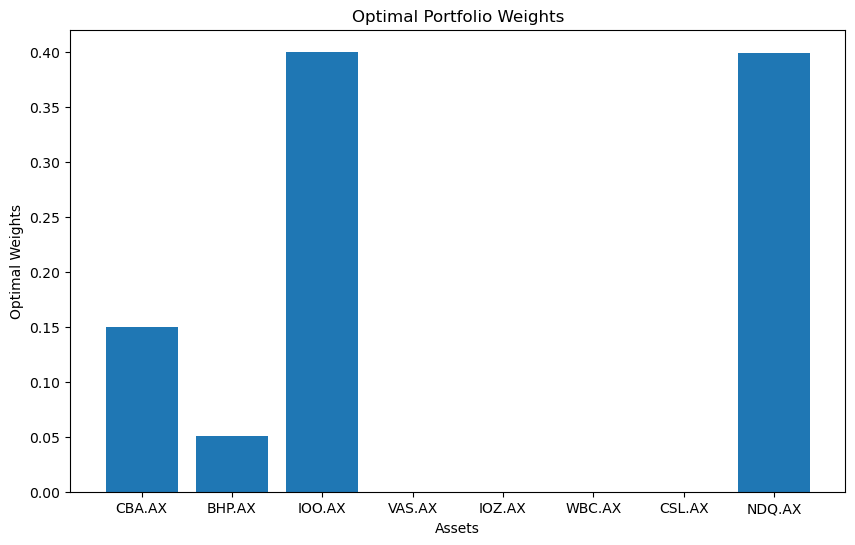

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)
plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')
plt.show()